In [1]:
import pandas as pd
pd.read_csv('diamonds.csv').head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
data=pd.read_csv("diamonds.csv")
print(data.shape)
data.head()

(53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
!pip install pandas_profiling

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [5]:
import pandas_profiling
report=pandas_profiling.ProfileReport(data)
report

Number of variables,10
Number of observations,53940
Total Missing (%),0.0%
Total size in memory,3.5 MiB
Average record size in memory,68.0 B
Numeric,3
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,4


In [6]:
import numpy as np
salary=[100,150,180,120,300000000]
salary=np.array(salary)
salary.mean()

60000110.0

In [7]:
salary=pd.Series(salary)
salary.median()

150.0

In [9]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\sadso\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


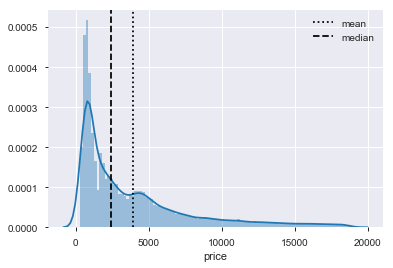

In [12]:
figure, ax=plt.subplots(nrows=1,ncols=1)
sns.distplot(data["price"],bins=100,ax=ax)
ax.axvline(data['price'].mean(),c='k',ls=':',label='mean')
ax.axvline(data['price'].median(),c='k',ls='--',label='median')
ax.legend()

In [13]:
data['price'].quantile(q=0.25)

950.0

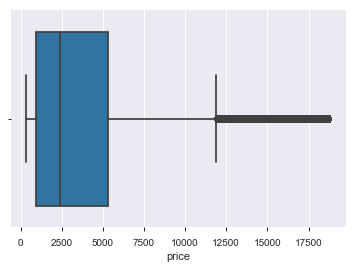

In [14]:
sns.boxplot(data["price"])

In [15]:
# Save

In [17]:
!pip install joblib

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [22]:
import os
from sklearn.externals import joblib

In [21]:
joblib.dump(data,open("diamonds-jl.pkl",'wb'),compress=True)

In [ ]:
#categoricals

In [24]:
data.groupby('cut')['price'].mean()

cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64

In [26]:
data['cut(category)']=data['cut'].astype('category')
data.dtypes

carat             float64
cut                object
color              object
clarity            object
depth             float64
table             float64
price               int64
x                 float64
y                 float64
z                 float64
cut(category)    category
dtype: object

In [30]:
data['cut(category)'].head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut(category), dtype: category
Categories (5, object): [Fair, Good, Ideal, Premium, Very Good]

In [27]:
data['cut(category)'].cat.categories

Index(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype='object')

In [29]:
data['cut(category)'].cat.codes.head()

0    2
1    3
2    1
3    3
4    1
dtype: int8

In [31]:
#tqdm
!pip install tqdm

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [32]:
!pip install faker

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [34]:
from faker import Faker


In [35]:
faker=Faker()
faker.name(), faker.text()

('Kristy Gardner',
 'Store one current.\nResponse foot kind wonder. Knowledge child certain computer help life his attorney.\nDo campaign five. Street hundred real movement because. Full professor information news create.')

In [37]:
def generate_fake_information():
    faker=Faker()
    return{
        'name':faker.name(),
        'message':faker.text(),
    }
generate_fake_information()

{'name': 'Susan Copeland',
 'message': 'Movement officer agreement pressure husband. Involve born my page believe. Leave among yes capital set herself.\nNation low develop try risk too. Chance myself president manager these.'}

In [39]:
data=[generate_fake_information() for _ in range(10)]
data=pd.DataFrame(data)
data

,message,name
0,Laugh travel foreign. Such painting anyone sen...,Stephanie Nelson
1,Race any create sport fine what. Street song s...,Darrell Davis PhD
2,Soon full eat cup. Resource may soldier servic...,Stacey Ryan
3,Raise language action among forward surface.\n...,Steven Wright
4,Its nothing station lawyer. Movie development ...,Eileen Weber
5,Majority exactly night structure where. Sugges...,Nathan Webb
6,Age painting mouth catch. Agent enough moment ...,Kayla Wright
7,Collection prove time not process light. Fly c...,Joanne Johnson
8,Gun color grow watch current method side. Baby...,John Anderson
9,Catch represent no term quickly scene. Beautif...,Deborah Ross


In [40]:
from tqdm import tqdm
data=[generate_fake_information() for _ in tqdm(range(1000))]
data=pd.DataFrame(data)
data

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:04<00:00, 17.93it/s]


,message,name
0,School close space. Health life guess bring. B...,Troy Shah
1,Charge positive huge respond skill everyone.\n...,Joseph Johnson
2,Throw real candidate body history participant....,Jonathan Ray
3,Thousand political again medical far operation...,Debra Mckinney
4,Accept maintain bar plan include. Kind without...,Anne Nelson
5,Ability about hope mind do sound road.\nOnly e...,Brandon Rogers
6,Memory understand single.\nEntire fund bill me...,Tiffany Waters
7,Himself morning remember sea five eat. Call wi...,Leslie Stewart
8,Always miss interview board. Notice may them v...,Samantha Patterson
9,New government individual level idea. Physical...,Angel Medina


In [42]:
from tqdm import tqdm_notebook
data=[generate_fake_information() for _ in tqdm_notebook(range(1000))]
data=pd.DataFrame(data)
data

,message,name
0,Democrat financial doctor break. Herself anoth...,Brandon Moore
1,Policy turn those. Performance tonight fire cl...,Shannon Johnson
2,Wonder assume within toward discussion. Fall t...,Christopher Wilson
3,Radio unit certainly direction relate. Call my...,Travis Sutton
4,Purpose record tonight talk over. Whose possib...,Jennifer Harrison
5,Many friend education management.\nAuthority b...,Carlos Skinner
6,Sign trade moment need million. Save bed down ...,Adam Morales
7,While president new later deep. Shake black he...,Justin Carpenter
8,Wait minute mind man small bad. Task experienc...,Heather Hoffman
9,Top explain suddenly run. Determine discover o...,Justin Golden
